# Exam Notebook

In [45]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

# Quesion 33

## Create a graph from an edge list

In [2]:
G = nx.Graph()

In [3]:
edges = [
    (1, 2), (1, 4),
    (2, 1), (2, 3), (2, 4),
    (3, 2),
    (4, 1), (4, 2), (4, 5), (4, 6),
    (5, 4), (5, 6), 
    (6, 4), (6, 5)
]

In [4]:
for edge in edges:
    G.add_edge(edge[0], edge[1])

## Clustering Coefficient

In [5]:
def clusteringCoefficient(graph, node):
    links = []
    neighbors = graph.neighbors(node)
    for n in neighbors:
        for e in graph.edges(n):
            if (e[0] != node) and (e[1] != node):
                if (e[0] in neighbors) and (e[1] in neighbors):
                    links.append(e)
    degree = len(graph.edges(node))
    return len(links)/(degree * (degree-1))

## Average Clustering Coefficient

In [6]:
def averageClusteringCoefficient(graph):
    ccs = []
    for node in G.nodes():
        ccs.append(clusteringCoefficient(G, node))
    return sum(ccs)/len(ccs)

## Test algorithm implementations

In [7]:
node = 4

In [8]:
clusteringCoefficient(G, node)

0.3333333333333333

In [9]:
averageClusteringCoefficient(G)

ZeroDivisionError: division by zero

## Validating with NetworkX's implementations

In [10]:
nx.clustering(G, node)

0.3333333333333333

In [11]:
nx.average_clustering(G)

0.611111111111111

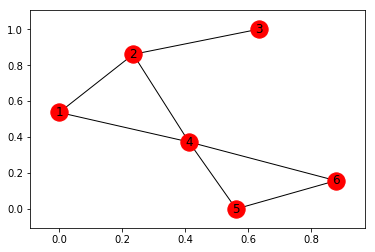

In [14]:
nx.draw_networkx(G)

# Question 34

In [23]:
graph = {
    1: {2, 4},
    2: {1, 5, 4, 3},
    3: {2, 7},
    4: {2, 1, 6, 5},
    5: {6, 2, 4},
    6: {4, 7, 5},
    7: {3, 6}
}

In [24]:
G = nx.Graph()

In [26]:
for node in graph:
    for link in graph[node]:
        print("{}-{}".format(node, link))
        G.add_edge(node, link)

1-2
1-4
2-1
2-3
2-4
2-5
3-2
3-7
4-1
4-2
4-5
4-6
5-2
5-4
5-6
6-4
6-5
6-7
7-3
7-6


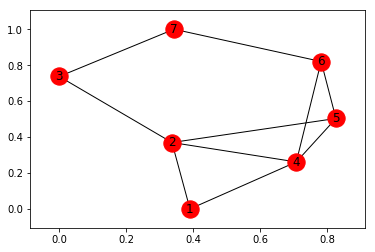

In [27]:
nx.draw_networkx(G)

In [37]:
nx.shortest_path(G)

{1: {1: [1],
  2: [1, 2],
  3: [1, 2, 3],
  4: [1, 4],
  5: [1, 2, 5],
  6: [1, 4, 6],
  7: [1, 2, 3, 7]},
 2: {1: [2, 1],
  2: [2],
  3: [2, 3],
  4: [2, 4],
  5: [2, 5],
  6: [2, 4, 6],
  7: [2, 3, 7]},
 3: {1: [3, 2, 1],
  2: [3, 2],
  3: [3],
  4: [3, 2, 4],
  5: [3, 2, 5],
  6: [3, 7, 6],
  7: [3, 7]},
 4: {1: [4, 1],
  2: [4, 2],
  3: [4, 2, 3],
  4: [4],
  5: [4, 5],
  6: [4, 6],
  7: [4, 6, 7]},
 5: {1: [5, 2, 1],
  2: [5, 2],
  3: [5, 2, 3],
  4: [5, 4],
  5: [5],
  6: [5, 6],
  7: [5, 6, 7]},
 6: {1: [6, 4, 1],
  2: [6, 4, 2],
  3: [6, 7, 3],
  4: [6, 4],
  5: [6, 5],
  6: [6],
  7: [6, 7]},
 7: {1: [7, 3, 2, 1],
  2: [7, 3, 2],
  3: [7, 3],
  4: [7, 6, 4],
  5: [7, 6, 5],
  6: [7, 6],
  7: [7]}}

In [38]:
nx.shortest_path_length(G)

{1: {1: 0, 2: 1, 3: 2, 4: 1, 5: 2, 6: 2, 7: 3},
 2: {1: 1, 2: 0, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2},
 3: {1: 2, 2: 1, 3: 0, 4: 2, 5: 2, 6: 2, 7: 1},
 4: {1: 1, 2: 1, 3: 2, 4: 0, 5: 1, 6: 1, 7: 2},
 5: {1: 2, 2: 1, 3: 2, 4: 1, 5: 0, 6: 1, 7: 2},
 6: {1: 2, 2: 2, 3: 2, 4: 1, 5: 1, 6: 0, 7: 1},
 7: {1: 3, 2: 2, 3: 1, 4: 2, 5: 2, 6: 1, 7: 0}}

In [39]:
nx.shortest_path_length(G, 1, 7)

3

# Question 35

In [30]:
nx.betweenness_centrality(G)

{1: 0.0,
 2: 0.26666666666666666,
 3: 0.1,
 4: 0.16666666666666666,
 5: 0.03333333333333333,
 6: 0.16666666666666666,
 7: 0.06666666666666667}

In [31]:
nx.betweenness_centrality(G)[2]

0.26666666666666666

# Question 36

using NetworkX

In [41]:
nx.closeness_centrality(G)

{1: 0.5454545454545454,
 2: 0.75,
 3: 0.6,
 4: 0.75,
 5: 0.6666666666666666,
 6: 0.6666666666666666,
 7: 0.5454545454545454}

manual calculation using normalized form:

$C(i) = \frac{N-1}{\sum_{y}d(y,x)}$

In [43]:
nx.shortest_path_length(G)[2]

{1: 1, 2: 0, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2}

In [44]:
nx.shortest_path_length(G)[2].values()

dict_values([1, 0, 1, 1, 1, 2, 2])

In [47]:
list(nx.shortest_path_length(G)[2].values())

[1, 0, 1, 1, 1, 2, 2]

In [48]:
np.sum(list(nx.shortest_path_length(G)[2].values()))

8

In [49]:
6/8

0.75

In [51]:
data = {
    0 : 1,
    1 : 3,
    2 : 6,
    3 : 12,
    4 : 24,
    5 : 48
}